<br></br>
<hr>

<h1> <center> Detection of students who are at risk of failing a class </center> </h1>
<h3> <center> Part 1 (Exploratory Analysis) </center> </h3>
<hr>
<br></br>

Following the outbreak of COVID-19, countries all over the world closed campuses and lecture halls to prevent the further spread of the infection. This led to a raise of online education at unprecedented scale, since millions of students all over the world were suddenly forced to continue studying online. But although isolation measures forced many universities to move their course offerings online, this learning mode has been gaining popularity every year. And there are good reasons for that. 

Emergence of distance education has offered many promises such as access to education regardless of where students live or when they decide to devote themselves to subject. Oftentimes this comes in combination with significantly lower tuition cost and pay-as-you-go payment mode. In theory, such flexibilities should offer great advantages over traditional classrooms.  In practice however, online education programs often fall short of what they attempt to accomplish due to problems related to low student retention rate. 

Therefore, with an intent to address this issue this project aims to achieve two goals. The first one is to visually examine through charts and plots the extent to which various socio-demographic and study-related factors are related to student's performance. The second goal however is to build ML models that would predict who is likely to fail the course even before the exams take place. The analysis of learners’ data thus might provide informed guidance to policy-makers and curriculum administrators who are interested in improving students’ learning experience and optimizing learning material according to students’ needs.


</br>

This project thus consists of two parts: [Part 1 (Exploratory Analysis)](Part_1_(Exploratory_Analysis).ipynb) and [Part 2 (Machine Learning)](Part_2_(Machine_Learning).ipynb)


## <center>Part 1 (Exploratory Data Analysis)</center>
<hr>

In this part of the project I will build and deploy models that predict who among students in an online university is at the risk of failing the course he or she is enrolled in. In case you are interested in <u><i>Part 2 (Machine Learning)</i></u>, click [here.](Part_2_(Machine_Learning).ipynb)





<br></br>

### Description of the data

Dataset necessary for the project is provided by Open University of the UK and is freely available on their website under the name *Open University Learning Analytics dataset*. Open University of UK is one of the largest online universities in the world, with 170,000 students enrolled. The dataset was created specifically for research purposes and contains socio-demographic data along with data about students’ interactions in the Virtual Learning Environment (VLE). The latter allows us to use students’ actions to examine their learning behavior. The dataset consists of the information about 22 courses, 32,593 students, results of their assessments, as well as logs of their interactions with the VLE represented by daily summaries of student clicks (10,655,280 entries). 



For more comprehensive information, including full data access, detailed data description and methodology for data selection, please visit Ope University's dedicated webpage: https://analyse.kmi.open.ac.uk/open_dataset


</br>
<hr>
<a id="1"></a>

#### <center>Data Exploration </center>

<hr>
</br>

In [1]:
## import libraries
import zipfile
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os

sns.set_style('whitegrid')
%matplotlib inline

### Allow Jupyter Notebook to display all columns
pd.options.display.max_columns = None

In [2]:
## Extract files
with zipfile.ZipFile('datasets.zip', 'r') as zip_reference:
    zip_reference.extractall()

Before starting an actual analysis, let's also define a couple of custom functions that we are going to use multiple times during the analysis. 

In [3]:
### Upload function
def read_table(table_name, usecols=None):
    df = pd.read_csv(table_name, usecols = usecols)
    df.drop_duplicates(inplace = True)
    empty_cols = df.columns[df.isnull().any()].tolist()  ## Create a list of columns that contain missing values

    print(f'Shape of the {table_name}: {df.shape}', end = '\n\n')
    return df

In [4]:
### Let's also calculate percentages, since this will facilitate interpreation of our visual findings
def calculate_percentages(df_column):
    result = df_column.value_counts(normalize=True).apply(lambda x: round(x*100, 2)) ## round up to 2 digits
    for key, value in result.items():
        print(f'{key}: {value} %')

</br>

#### Overall information about students

In [5]:
student_info = read_table("studentInfo.csv")
student_info.head(3)

Shape of the studentInfo.csv: (32593, 12)



,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn


In [6]:
print(student_info['id_student'].duplicated().value_counts())

False    28785
True      3808
Name: id_student, dtype: int64


</br>

It turns out that the table contains information about the same students multiple times. It might occur if at the time of data recording the same students were enrolled in multiple courses or if he/she is retaking the course. In any case, since repeated observation of the same students can skew the analysis, let's create another table that will only contain data about unique students.

In [7]:
student_info_unique = student_info.drop_duplicates(['id_student'])

In [8]:
student_registration = read_table('studentRegistration.csv')
student_registration.head(2)

Shape of the studentRegistration.csv: (32593, 5)



,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN


<br> </br>

**Final Results**

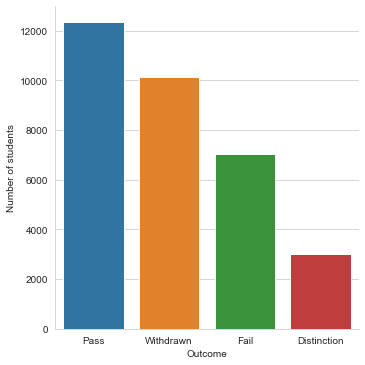

Pass: 37.93 %
Withdrawn: 31.16 %
Fail: 21.64 %
Distinction: 9.28 %


In [9]:
outcome_distribution = sns.catplot(data=student_info, x='final_result', kind='count')
plt.xlabel('Outcome')
plt.ylabel('Number of students')
plt.show()
calculate_percentages(student_info['final_result'])

In [10]:
## Since those who completed a course with distinction have to be the ones who passed it.
student_info.loc[student_info['final_result'] == 'Distinction','final_result'] = 'Pass'

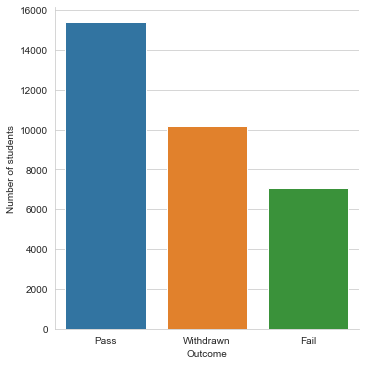

In [11]:
sns.catplot(data=student_info, x='final_result', kind='count')
plt.xlabel('Outcome')
plt.ylabel('Number of students')
plt.show()

In [12]:
calculate_percentages(student_info['final_result'])

Pass: 47.2 %
Withdrawn: 31.16 %
Fail: 21.64 %


</br>

From the graph above we can infer that most of the students pass their courses, while  those who fail constitute the least frequent category.
To my surprise, students withdraw more way more frequently than I expected at the very beginning. Why is that  the case? My initial guess is that this might be due to self-selection: those students who expect that they are likely to fail might tend to withdraw in before the course ends. But in order to make evidence-based claims, let's explore the phenomenon deeper by looking into the nature of withdrawals in the data we have in hands.

</br>

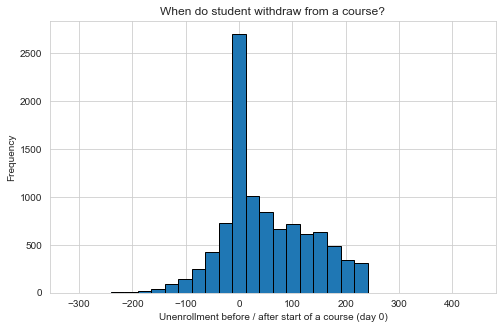

In [13]:
student_registration.dropna(inplace = True)
plt.figure(figsize=(8,5))
student_registration['date_unregistration'].plot(kind = 'hist', edgecolor='black', bins = 30 )
plt.title('When do student withdraw from a course?')
plt.xlabel('Unenrollment before / after start of a course (day 0)')
plt.show()



As you can see from the histogram above, students tend to withdraw from the course at any time before or after course starts (negative numbers indicate that students unenrolled before online course has started). This suggests that perhaps we should exclude data for those who withdrew from the course. There are several reasons for why not excluding withdrawn students is likely a bad idea.

<ol>
  <li>First, it brings an issue of data leakage. That is, we will find ourselves in a situation where we make predictions for someone who might have already unenrolled from the course. </li> <br>
    
  <li>Secondly, students can unenroll from a course for a variety of reasons. Therefore, including them into a prediction model is likely to bring additional noise, which in turn might impact model's predictive power. </li> <br>
    
<li>Third, considering withdrawn students as a separate class bring brings exactly the same problems as merging them with those who failed. What is the point of finding out that a student is likely to withdraw from a class by the time course is about to finish if he or she already did so at the very beginning? </li> <br>
    
</ol>    

</br>

#### Demographic Information

</br>

**IMD band**
* The Index of Multiple Deprivation (IMD) is an index officially used in the UK that is used to measure the level of deprivation of at the level of neighborhood within across municipalities. To read more about it, visit the following Wikipedia article: (https://en.wikipedia.org/wiki/Multiple_deprivation_index)

* In its original form, the index ranges from 1 (the most deprived area) to 32,844 (the least deprived area).

* In our case, **imd_band** shows the percentile range to which  student's residential area falls into.

Due to some student repeating modules, for the initial demographic analysis I will remove their duplicate information and only keep one record per student.

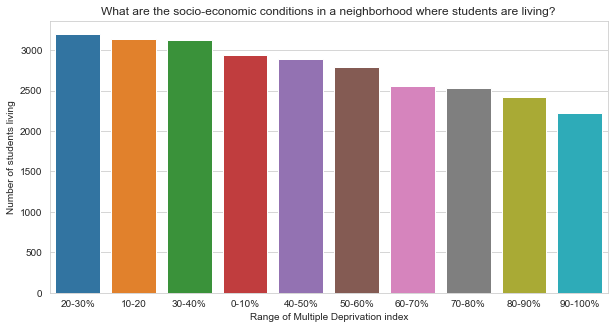

Number of students for whom IMD Band is uknown: 1111


In [14]:
plt.figure(figsize=(10, 5))
sns.countplot(x='imd_band', data = student_info_unique, order = student_info_unique['imd_band'].value_counts().index)
plt.title('What are the socio-economic conditions in a neighborhood where students are living?')
plt.xlabel('Range of Multiple Deprivation index')
plt.ylabel('Number of students living')
plt.show()

print(f"Number of students for whom IMD Band is uknown: {student_info['imd_band'].isna().sum()}")

In [15]:
calculate_percentages(student_info['imd_band'])

20-30%: 11.61 %
30-40%: 11.24 %
10-20: 11.17 %
0-10%: 10.52 %
40-50%: 10.34 %
50-60%: 9.92 %
60-70%: 9.23 %
70-80%: 9.14 %
80-90%: 8.77 %
90-100%: 8.06 %


Since no value appears to have a significantly higher frequency, I think that we can substitute missing values with an average value.


##### Gender of Students

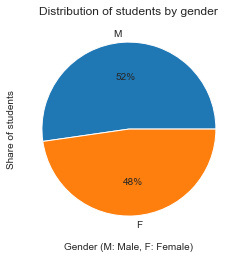

M: 52.27 %
F: 47.73 %


In [16]:
plt.figure(figsize=(5, 4))
student_info_unique['gender'].value_counts().plot(kind = 'pie', autopct ='%1.0f%%')
plt.title('Distribution of students by gender')
plt.xlabel('Gender (M: Male, F: Female)')
plt.ylabel('Share of students')
plt.show()


calculate_percentages(student_info_unique['gender'])

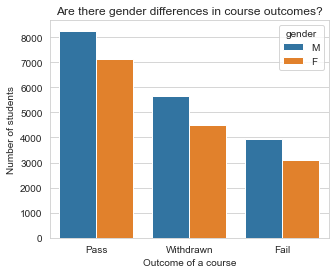

In [17]:
plt.figure(figsize=(5, 4))
sns.countplot(x='final_result', data = student_info, hue = 'gender')
plt.title('Are there gender differences in course outcomes?')
plt.xlabel('Outcome of a course')
plt.ylabel('Number of students')
plt.show()

There seems to be an insignificant (possibly zero) effect of a gender the success of students in a class. The primary source of difference that you see  in a plot above comes from the fact that there are slightly more male students in the dataset to begin with. Otherwise, at least visually, it seems that the proportion of students from both genders in each category is more or less equal.

In [18]:
student_info.head(2)

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass


##### Disability Status

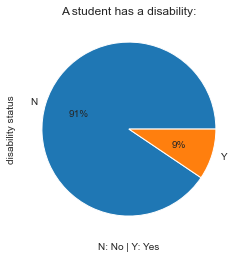

In [19]:
plt.figure(figsize=(5, 4))
student_info_unique['disability'].value_counts().plot(kind = 'pie', autopct ='%1.0f%%')
plt.title('A student has a disability:')
plt.xlabel("N: No | Y: Yes")
plt.ylabel("disability status")
plt.show()

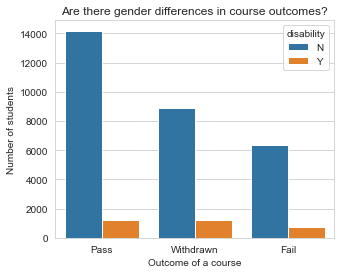

In [20]:
plt.figure(figsize=(5, 4))
sns.countplot(x='final_result', data = student_info, hue =  'disability')
plt.title('Are there gender differences in course outcomes?')
plt.xlabel('Outcome of a course')
plt.ylabel('Number of students')
plt.show()

</br>

#### Information about students' online activity

Now, we import file that contains information about students' interactions with a Virtual Learning Enviroment.

After importing files, we can find the total number of clicks made by a student enrolled in a particular class that was offered at a particular semester. This will be helpful to see if more interaction with the online learning material (VLE) is associated with higher chances of passing an exam.

In [21]:
student_vle_interact = read_table('studentVle.csv', usecols=['id_site','code_module','code_presentation','id_student','sum_click']) 
vle = read_table('vle.csv', usecols = ['id_site', 'code_module', 'code_presentation', 'activity_type'])

Shape of the studentVle.csv: (4327256, 5)

Shape of the vle.csv: (6364, 4)



In [22]:
## Merge two tables together in order to obtain the complete information regarding student's interaction with learning material
student_interaction = pd.merge(student_vle_interact, vle, on = ['id_site', 'code_module', 'code_presentation'])
student_interaction.head(3)

,code_module,code_presentation,id_student,id_site,sum_click,activity_type
0,AAA,2013J,28400,546652,4,forumng
1,AAA,2013J,28400,546652,1,forumng
2,AAA,2013J,28400,546652,8,forumng


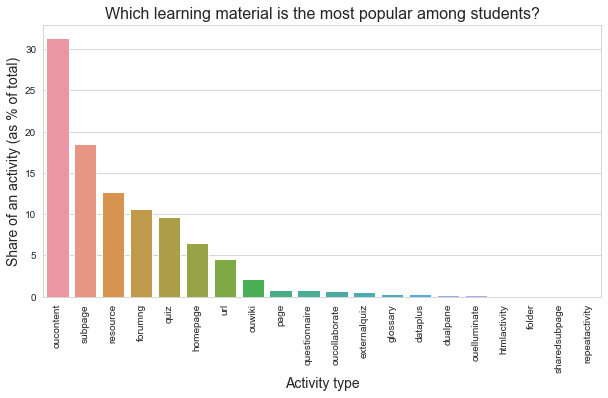

In [23]:
activity_type = student_interaction['activity_type'].value_counts(normalize = True).sort_values(ascending = False).apply(lambda x: x*100)

### Plot of the results
plt.figure(figsize=(10,5))
plot = sns.barplot(x = activity_type.index,  # index = category name
                   y = activity_type.values, # value = count for each category
                     )
plot.set_xticklabels(plot.get_xticklabels(), rotation=90, horizontalalignment='center')
plt.xlabel(xlabel='Activity type', fontsize = 14)
plt.ylabel(ylabel='Share of an activity (as % of total)', fontsize = 14)
plt.title("Which learning material is the most popular among students?", fontsize = 16)
plt.show()

In [24]:
## Aggregate over all activities to find total number of clicks
student_interaction = student_interaction.groupby(['id_student', 'code_module', 'code_presentation']).agg({'sum_click': ['sum']})
student_interaction.columns = ['sum_of_clicks']
student_interaction.reset_index(inplace = True)

In [25]:
student_interaction.head(3)

,id_student,code_module,code_presentation,sum_of_clicks
0,6516,AAA,2014J,1815
1,8462,DDD,2013J,456
2,8462,DDD,2014J,9


In [26]:
print(f"Number of students recorded in the entire dataset: {student_info['id_student'].count()}", end = '\n\n')
print(f"Number of students who interacted with VLE: {student_interaction['id_student'].count()}")

Number of students recorded in the entire dataset: 32593

Number of students who interacted with VLE: 29228


</br>

Out of  32,593 unique students only 29,228 have ever interacted with the learning material. This suggests that somewhere around 3,300 students who have never used the VLE at all. Let's explore who those students are. But to  be able to do this, we will have to join two tables together first.

</br>

Note that both **student_interaction** and **student_info** tables have 3 columns in common. Thus, let us join them in order to create a single table. 

In [27]:
student_data = pd.merge(student_info, student_interaction, 
               on=['code_module','code_presentation','id_student'],
               how='left')

print(student_data.shape)

(32593, 13)


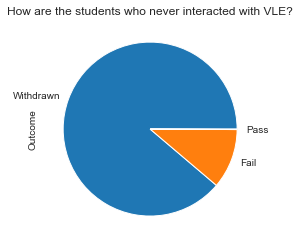

Withdrawn: 88.8 %
Fail: 11.11 %
Pass: 0.09 %


In [28]:
no_clicks = student_data[student_data['sum_of_clicks'].isna()][['sum_of_clicks', 'final_result']]

no_clicks['final_result'].value_counts().plot(kind = 'pie')
plt.title("How are the students who never interacted with VLE?")
plt.ylabel('Outcome')
plt.show()

calculate_percentages(no_clicks['final_result'])

Almost everyone who have not touched the learning material at all has either withdrawn from or failed the course. This suggests that absence of interactions with VLE is a good indicator of whether a student failed the course. Partially, it can also be explained as follows: some students have withdrawn from the course because they have changed their minds about taking the this class at all and thus left without ever touching the VLE.

</br>

#### Information about course assignments

Lastly, let's upload  files that contain information about students' performances on a subject he or she is enrolled. Since we are interested in predicting whether a student will fail/pass the course, we will need to exclude rows that contain information about scores in **Exam**. This is especially true when performing predictions using Machine Learning. Otherwise, there will be no point of predicting student's performance if we already know the exam score. This is a typical example of what is called **data leakage**.

In [29]:
## Upload data about the type of assessments
assessments = read_table('assessments.csv')

## Drop rows that contain assessment type Exam
assessments = assessments[assessments["assessment_type"]!="Exam"]

## Upload table about student's performance in each assignment
student_assesment = read_table('studentAssessment.csv')

## Merge two tables
student_scores = pd.merge(assessments, student_assesment, on = 'id_assessment')

Shape of the assessments.csv: (206, 6)

Shape of the studentAssessment.csv: (173912, 5)



</br>

As in the previous case, I will aggreagte data and try to obtain some new features based on existing ones.

In [30]:
### Calculate how often did students miss deadline for submitting assignments.
student_scores['submitted_with_delay'] = np.where(student_scores['date_submitted'] > student_scores['date'], 1, 0)


## At this moment we can get rid of unnecessary columns that are very unlikley to contain any useful information after this point.
student_scores.drop(columns = ['id_assessment', 'date', 'date_submitted', 'assessment_type', 'is_banked'], axis = 1, inplace = True)

###  Impute NaN values with an average score of a student within the subject
student_scores['score'] = student_scores.groupby(['code_module', 'id_student'])['score'].apply(lambda x: x.fillna(x.mean()))

### Even after what I did above, there are still 21 NaN for the score column. To overcome it, I will simply replace them with class average.
student_scores['score'] = student_scores.groupby(['code_module'])['score'].apply(lambda x: x.fillna(x.mean()))


## Create a column that represents a weighted score in an assignment
student_scores['weighted_score'] = (student_scores['weight']/100)*student_scores['score']

</br>

Since some assignments have the weight of zero (most likley these are self-study or additional exercises), it makes sense to calculate two different types of total scores for each student. One representing the weighted score, while another one being a total number of points accumulated. The same can also be applied when aclculating a final average score (weithted vs. unweighted) a student has earned during the course.

In [31]:
## Create a column representing performance in non-credit assignments(i.e. with weight of 0)
student_scores['score_in_non-credit_assignments'] = np.where(student_scores['weight']==0, student_scores['score'], 0)


### Aggregate data accross every student, class and semster to compute each student's overall performance.
student_scores = student_scores.groupby(['code_module','code_presentation','id_student']).agg({'score' : ['sum', 'mean'],
                                                                            'submitted_with_delay': ['count'],
                                                                            'weighted_score': ['sum', 'mean'],
                                                                            'score_in_non-credit_assignments':['sum','mean']
                                                                                }).reset_index().round(2)

## Rename column so that they make more sense
student_scores.columns = ['code_module', 'code_presentation', 'id_student', 'unweighted_score', 
                          'unweighted_avg_score', 'times_overdue', 'weighted_score', 'weighted_avg_score',
                          'non_credit_score_total', 'non_credit_score_avg']


display(student_scores.head(3))

,code_module,code_presentation,id_student,unweighted_score,unweighted_avg_score,times_overdue,weighted_score,weighted_avg_score,non_credit_score_total,non_credit_score_avg
0,AAA,2013J,11391,410.0,82.0,5,82.4,16.48,0.0,0.0
1,AAA,2013J,28400,332.0,66.4,5,65.4,13.08,0.0,0.0
2,AAA,2013J,31604,380.0,76.0,5,76.3,15.26,0.0,0.0


In [32]:
print(student_scores.shape)

(25839, 10)


</br>

#### Merging all information into a signle table

Finally, let us join all tables together in order to create a single dataframe that we are going to use from now on.

In [33]:
data = pd.merge(student_data, student_scores, 
               on=['code_module','code_presentation','id_student'],
               how='left')

## Additionally, let us delete possibly duplicate rows
data.drop_duplicates(inplace = True)
display(data.head(3))

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,sum_of_clicks,unweighted_score,unweighted_avg_score,times_overdue,weighted_score,weighted_avg_score,non_credit_score_total,non_credit_score_avg
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,801.0,410.0,82.0,5.0,82.4,16.48,0.0,0.0
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,875.0,332.0,66.4,5.0,65.4,13.08,0.0,0.0
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,211.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
data.shape

(32593, 20)

<Figure size 2160x720 with 0 Axes>

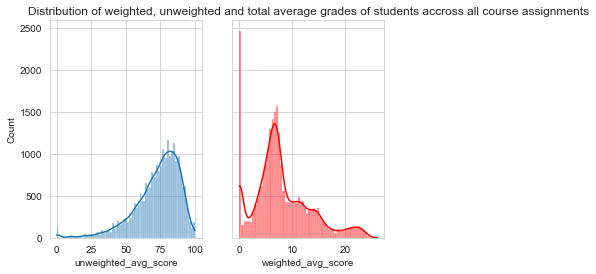

In [35]:
plt.figure(figsize=(30,10))
fig, ax =plt.subplots(ncols=2, sharey=True)
sns.histplot(data['unweighted_avg_score'], kde=True, ax=ax[0])
sns.histplot(data['weighted_avg_score'], kde=True, ax=ax[1], color = 'red')
plt.title('Distribution of weighted, unweighted and total average grades of students accross all course assignments')
plt.show()

In [36]:
failed = data.loc[data['final_result'] == 'Fail']
passed = data.loc[data['final_result'] == 'Pass']
withdrew = data.loc[data['final_result'] == 'Withdrawn']

Weighted average grades for each category: 

Passed: 9.27 
Failed: 6.32 
Withdrew: 5.73 


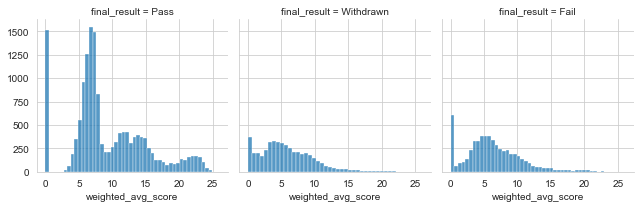

In [37]:
fig = sns.FacetGrid(data, col="final_result")
fig.map(sns.histplot, 'weighted_avg_score')


#Average grades for the three categories
print('Weighted average grades for each category: ', end = "\n\n")
print(f"Passed: {round(passed['weighted_avg_score'].mean(),2)} ")
print(f"Failed: {round(failed['weighted_avg_score'].mean(),2)} ")
print(f"Withdrew: {round(withdrew['weighted_avg_score'].mean(),2)} ")

Unweighted average grades for each category: 

Passed: 78.86 
Failed: 64.62 
Withdrew: 64.16 


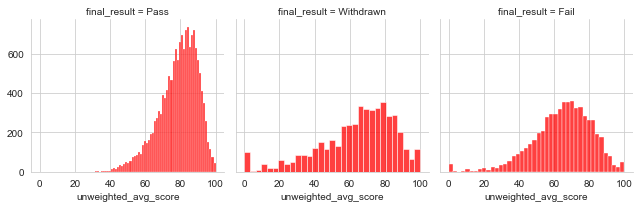

In [38]:
fig = sns.FacetGrid(data, col="final_result")
fig.map(sns.histplot, 'unweighted_avg_score', color = 'red')

#Average grades for the three categories
print('Unweighted average grades for each category: ', end = "\n\n")
print(f"Passed: {round(passed['unweighted_avg_score'].mean(),2)} ")
print(f"Failed: {round(failed['unweighted_avg_score'].mean(),2)} ")
print(f"Withdrew: {round(withdrew['unweighted_avg_score'].mean(),2)} ")

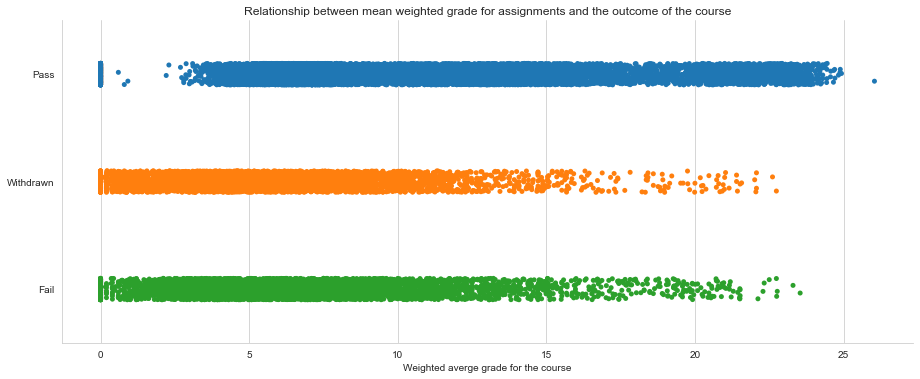

In [39]:
fig = sns.catplot(y="final_result", x="weighted_avg_score", data=data)
fig.fig.set_figwidth(15)
fig.fig.set_figheight(5)
fig.set(xlabel='Weighted averge grade for the course', ylabel='',title='Relationship between mean weighted grade for assignments and the outcome of the course');

<br>

As the plot above shows, the students who pass a class on average receive higher grades than those who withdraw or fail. The grades of students who fail are almost identical to those who failed.

</br>

As can be seen from the graph below, as a general rule, those who tend to submit graded assignment with a delay (i.e. after the deadline) usually receive lower grades.

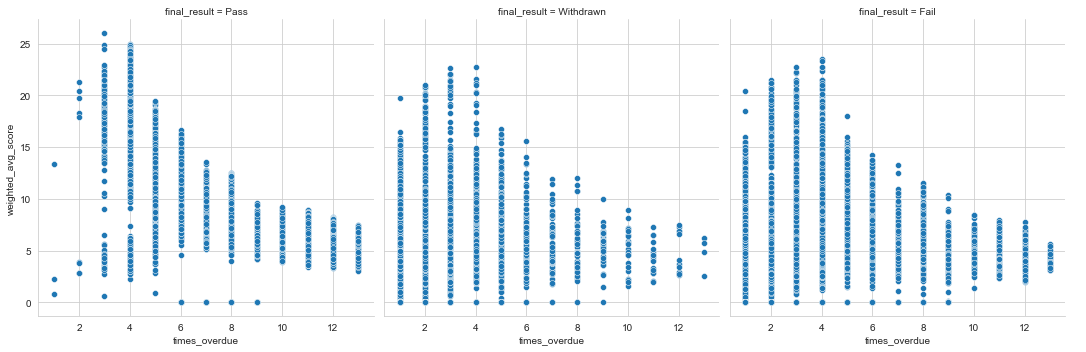

In [40]:
g = sns.FacetGrid(data, col="final_result", height=5)
g.map(sns.scatterplot, "times_overdue", "weighted_avg_score")
g.add_legend()

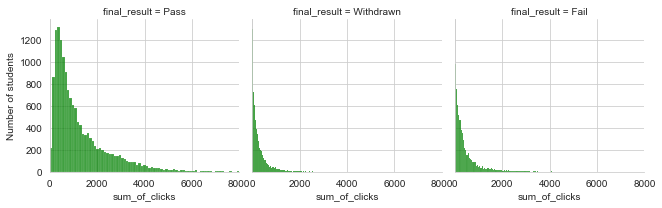

Average number of clicks for each category: 

Passed: 1277.71 
Failed: 471.1 
Withdrew: 303.1 


In [41]:
fig = sns.FacetGrid(data, col="final_result")
fig.map(sns.histplot, 'sum_of_clicks', color = 'green')
fig.set(ylabel='Number of students')
plt.xlim(0, 8000)
plt.show()

#Number of clicks for the three categories
print('Average number of clicks for each category: ', end = "\n\n")
print(f"Passed: {round(passed['sum_of_clicks'].mean(),2)} ")
print(f"Failed: {round(failed['sum_of_clicks'].mean(),2)} ")
print(f"Withdrew: {round(withdrew['sum_of_clicks'].mean(),2)} ")

From looking at the plot from above we can infer the following. Although there are a lot students who had very little interaction with VLE, but still managed to pass the course, having a frequent interaction with VLE means that a student is very likely to pass the course, since those fail or withdraw typically rarely have over 2000 clicks in total. Thus, high number of clicks is likely to be a good indicator that the student will succeed in a course. On the other hand, if a student has relatively low number of clicks, then if we base our judgments on this information only, it will be hard to distinguish between those who pass and fail.

Lastly, let's see if average score is associated with higher number of clicks.

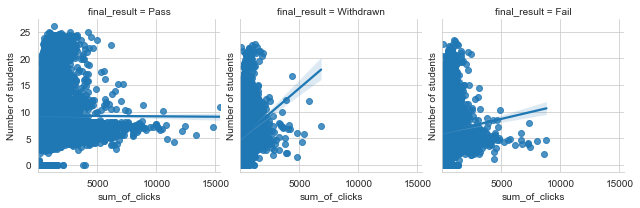

In [42]:
fig = sns.FacetGrid(data, col="final_result")
fig.map(sns.regplot, 'sum_of_clicks',  'weighted_avg_score')
fig.set(ylabel='Number of students')
plt.show()

Based on the output, it like for those students who passed, number of clicks don't play a significant role on their average score on assignments. For two other categories there seems to be some positive effect.

<hr>

</br>

In the next part of this two series project I will build and deploy actual models that predict who among students in an online university is at the risk of failing the course. In case you are interested in seeing it as well, click [here.](Part_2_(Machine_Learning).ipynb)